In [1]:

import numpy as np 
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
#This displays first 5 data from the training-dataset
train_data.head()
#observation: the dataset consists of categorical variable and a few numerical variables.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.tail()
#displaying bottom 5 data from the training-dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
#Finding dimensions
print("number of rows in traning set",train_data.shape[0])
print("number of columns in training set",train_data.shape[1])
print("number of rows in test set",test_data.shape[0])
print("number of columns in test set",test_data.shape[1])

number of rows in traning set 891
number of columns in training set 12
number of rows in test set 418
number of columns in test set 11


In [5]:
train_data.isna().sum()
#Here Age,Cabin and Embarked have missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_data.isna().sum()
#here Age,Fare,Cabin have missing values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

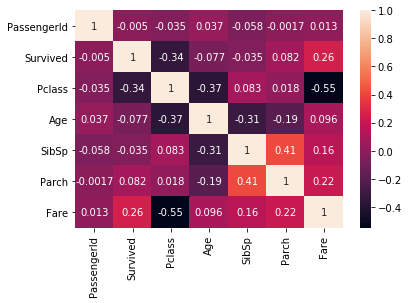

In [7]:
sns.heatmap(train_data.corr(),annot=True)
#Age is correlated to PCLASS the most with correlation coff=-0.37.


In [8]:
df=train_data.groupby('Pclass',as_index=False)['Age'].median()
df.head()

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


In [9]:
#Replacing missing values in training set
#AGE
for i,row in train_data.iterrows():
    if(np.isnan(train_data['Age'][i])==True):
        if(train_data['Pclass'][i]==1):
            train_data['Age'][i]=37.0
        elif(train_data['Pclass'][i]==2):
            train_data['Age'][i]=29.0
        else:
            train_data['Age'][i]=24.0
#CABIN (It has maximum number of missing values and hence it will NOT be worth a feature to work on. Still we will replace
#the missing values with its mode)
train_data['Cabin']=train_data['Cabin'].fillna(train_data['Cabin'].mode()[0])
#EMBARKED
#For this we have two missing values each having equivalent Fare of $80 and same PClass,same ticketnumber this
#means that they had to board from the same station.And on google search, I got to know that she boarded from SouthHampton.
#This means that Both of them boarded from SouthHampton.
train_data['Embarked']=train_data['Embarked'].fillna('S')

In [10]:
train_data.info()
#no missing values in training set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df=test_data.groupby('Pclass',as_index=False)['Age'].median()
df.head()

,Pclass,Age
0,1,42.0
1,2,26.5
2,3,24.0


In [12]:
#Replacing Missing Values in Test Set
#AGE
for i,row in test_data.iterrows():
    if(np.isnan(test_data['Age'][i])==True):
        if(test_data['Pclass'][i]==1):
            test_data['Age'][i]=42.0
        elif(test_data['Pclass'][i]==2):
            test_data['Age'][i]=26.0
        else:
            test_data['Age'][i]=24.0
#CABIN
test_data['Cabin']=test_data['Cabin'].fillna(test_data['Cabin'].mode()[0])
#FARE
#We can see that Fare is most correlated to Pclass and hence it should be computed by median of fare grouped by pclass.
#As the person belonged to class 3, we will take median of class 3.

In [13]:
df=test_data.groupby('Pclass',as_index=False)['Fare'].median()
df.head()

,Pclass,Fare
0,1,60.0000
1,2,15.7500
2,3,7.8958


In [14]:
test_data['Fare']=test_data['Fare'].fillna(7.89)
test_data.isna().sum()
#NO MISSING VALUES

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

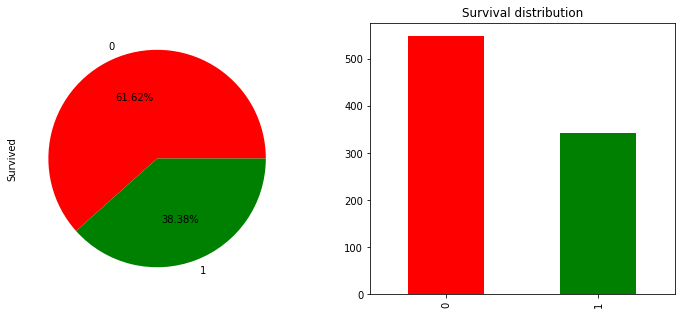

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train_data['Survived'].value_counts().plot.pie(autopct='%0.2f%%',colors=['red','green'])
plt.subplot(122)
plt.title('Survival distribution')
train_data.Survived.value_counts().plot(kind='bar',color=['red','green'])
#Not a balanced dataset and majorly people have not survived.

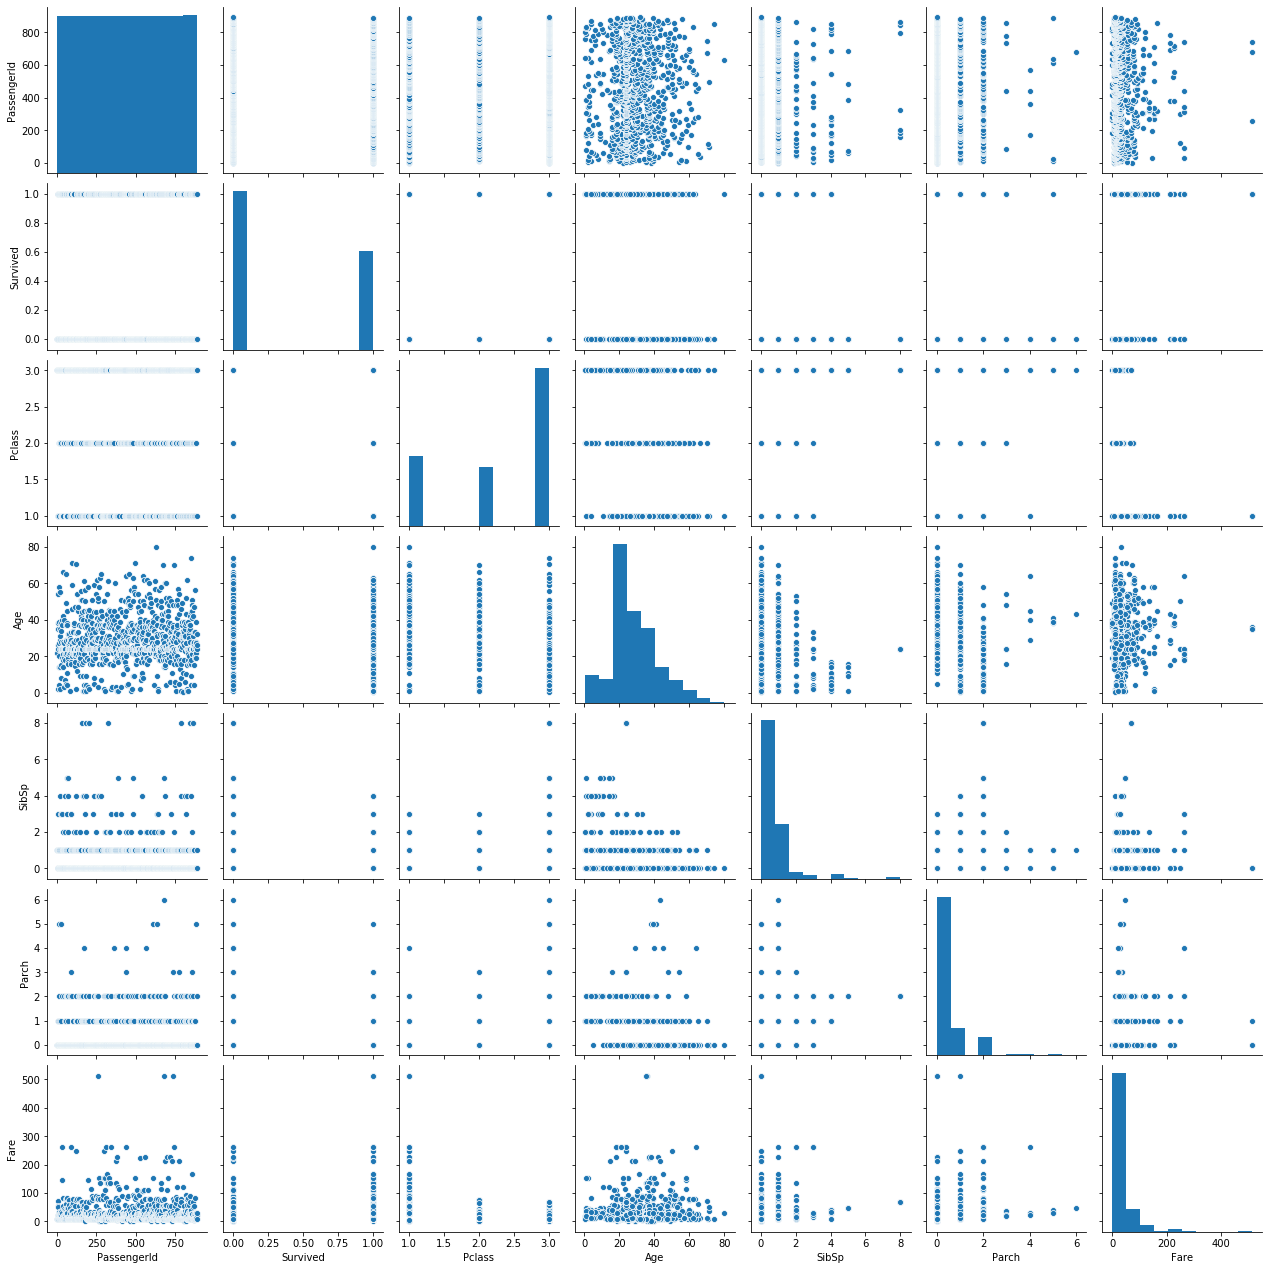

In [16]:
sns.pairplot(train_data)

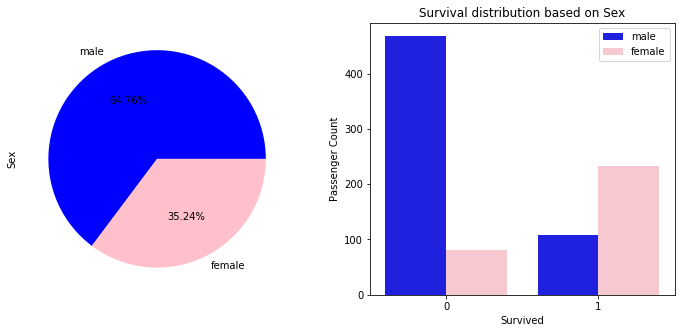

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train_data['Sex'].value_counts().plot.pie(autopct='%0.2f%%',colors=['blue','pink'])
plt.subplot(122)
sns.countplot(x = 'Survived',data = train_data,hue = 'Sex',palette=['blue','pink'])
plt.xlabel('Survived')
plt.ylabel('Passenger Count')
plt.title('Survival distribution based on Sex')
plt.legend()
#This shows gender proved to be one of a predictor of Survival. On reading about the titanic, I found that there was a protocol called 'women and children' first for loading of lifeboats that could have been a major cause of less number of men who survived.

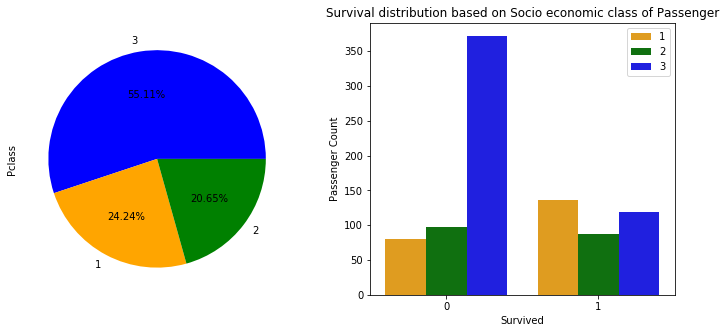

In [31]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train_data['Pclass'].value_counts().plot.pie(autopct='%0.2f%%',colors=['blue','orange','green'])
plt.subplot(122)
sns.countplot(x = 'Survived',data = train_data,hue = 'Pclass',palette=['orange','green','blue'])
plt.xlabel('Survived')
plt.ylabel('Passenger Count')
plt.title('Survival distribution based on Socio economic class of Passenger')
plt.legend()
#Almost half of the population on Titanic was from the lower class(Class 3).
#It can be seen that almost equal amount of people survived in all three categories. Because of majority of lower class people, they couldnt be attended and hence many people of lower category died due to chaos etc.Pclass slightly varies in the Survival category and hence can be a good feature to work on.

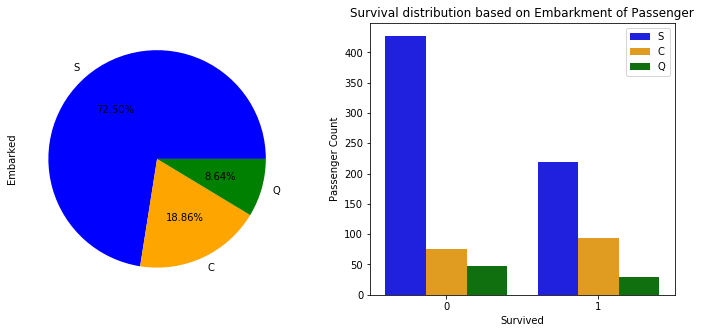

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train_data['Embarked'].value_counts().plot.pie(autopct='%0.2f%%',colors=['blue','orange','green'])
plt.subplot(122)
sns.countplot(x = 'Survived',data = train_data,hue = 'Embarked',palette=['blue','orange','green'])
plt.xlabel('Survived')
plt.ylabel('Passenger Count')
plt.title('Survival distribution based on Embarkment of Passenger')
plt.legend()
#There seem to be a good variation in survival with the Embarked Destination. Hence a good feature.

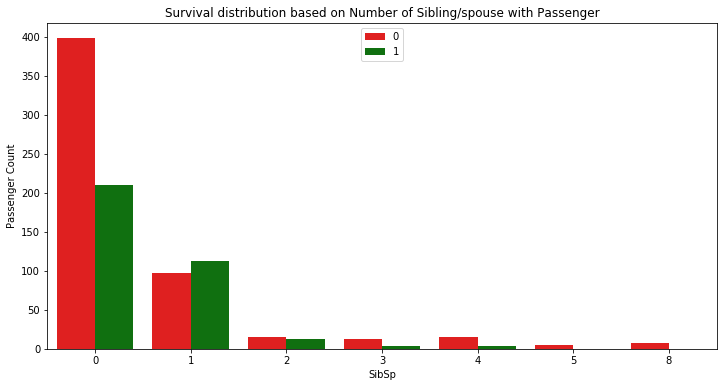

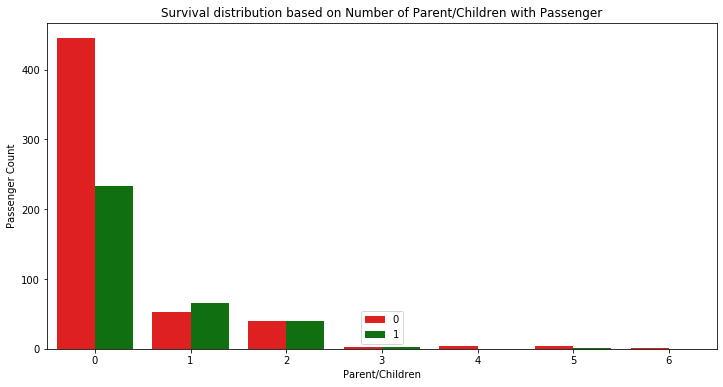

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'SibSp',data = train_data,hue = 'Survived',palette=['red','green'])
plt.xlabel('SibSp')
plt.ylabel('Passenger Count')
plt.title('Survival distribution based on Number of Sibling/spouse with Passenger')
plt.legend()

plt.figure(figsize=(12,6))
sns.countplot(x = 'Parch',data = train_data,hue = 'Survived',palette=['red','green'])
plt.xlabel('Parent/Children')
plt.ylabel('Passenger Count')
plt.title('Survival distribution based on Number of Parent/Children with Passenger')
plt.legend()
#We can see that Survival rate decreases with increase in number of Sibling/Spouse parent/children with the Passenger. And hence this can also be used as a Predictor.

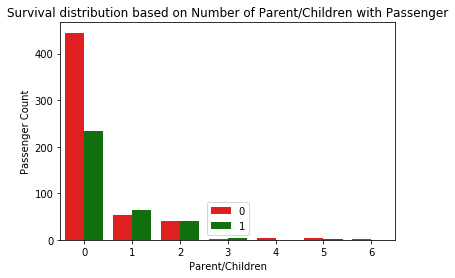

In [28]:
sns.countplot(x = 'Parch',data = train_data,hue = 'Survived',palette=['red','green'])
plt.xlabel('Parent/Children')
plt.ylabel('Passenger Count')
plt.title('Survival distribution based on Number of Parent/Children with Passenger')
plt.legend()
#We can see that Survival rate decreases with increase in number of Parent/Children with the Passenger. And hence this can also be used as a Predictor.

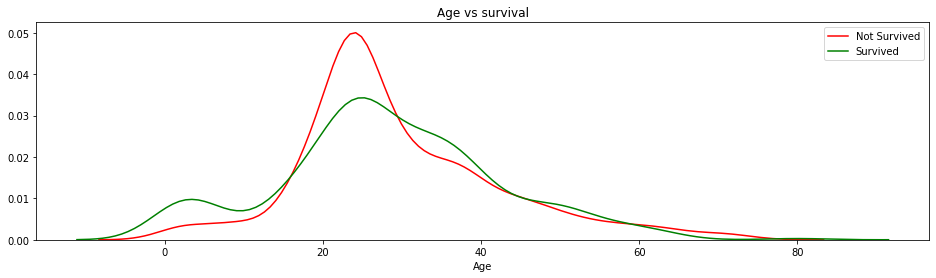

In [27]:
plt.figure(figsize=(16,4))
plt.title('Age vs survival')
sns.distplot(train_data['Age'][train_data['Survived']==0],bins=20,kde=True,hist=False,kde_kws={"color": "red", "label": "Not Survived"})
sns.distplot(train_data['Age'][train_data['Survived']==1],bins=20,kde=True,hist=False,kde_kws={"color": "green", "label": "Survived"})
# Age seems to vary with survival. Young-adults have more chance of surviving, while older people having age greater than 60 are at risk. the following age bins show significant variation in survival
# age<15) : 0
# Age(15-30) : 1
# Age(30-60) : 2
# age >60 : 3

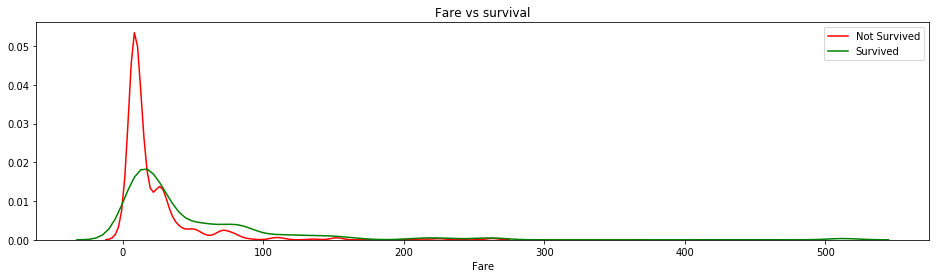

In [25]:
plt.figure(figsize=(16,4))
plt.title('Fare vs survival')
sns.distplot(train_data['Fare'][train_data['Survived']==0],bins=10,kde=True,hist=False,kde_kws={"color": "red", "label": "Not Survived"})
sns.distplot(train_data['Fare'][train_data['Survived']==1],bins=10,kde=True,hist=False,kde_kws={"color": "green", "label": "Survived"})
#Fare seems to vary with survival. the following fare bins show significant variation in survival
# 1.fare >0 and fare<=20 :0
# 2.fare >20 : 1 